# Libraries

In [ ]:
pip install beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from bs4 import BeautifulSoup
import re
from hazm import Normalizer
from hazm import word_tokenize
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, classification_report
from matplotlib import pyplot as plt
import seaborn as sns
#import what you need
import warnings
warnings.filterwarnings("ignore")

# Load data

In [ ]:
#TODO
df = pd.read_csv('C:/Users/hamidreza/Desktop/tasnim.csv',encoding='utf-8')

In [ ]:
df.head()

,category,title,abstract,body,time
0,سیاسی,میرکاظمی: زمان حذف ارز ۴۲۰۰ تومانی مشخص نیست,رئیس سازمان برنامه و بودجه گفت: هر زمان شرایط...,به گزارش گروه پارلمانی ، «مسعود میرکاظمی» رئی...,۲۴ فروردين ۱۴۰۱ - ۰۹:۵۰
1,سیاسی,طرح ۲ فوریتی شفافیت قوای سه‌گانه با ۲۰۰ امضا ...,نماینده نیشابور در مجلس از ارائه طرح ۲ فوریتی...,احسان ارکانی نماینده مردم نیشابور در مجلس شورا...,۲۴ فروردين ۱۴۰۱ - ۰۹:۵۰
2,سیاسی,رئیسی انتخاب نخست وزیر جدید پاکستان را تبریک ...,رئیس جمهور کشورمان طی پیامی انتخاب نخست وزیر ...,به گزارش حوزه دولت ، آیت‌الله سید ابراهیم رئی...,۲۵ فروردين ۱۴۰۱ - ۱۳:۵۴
3,سیاسی,اصلاح اساسنامه شرکت شهر فرودگاهی امام خمینی (...,اساسنامه شرکت شهر فرودگاهی امام خمینی(ره) در ...,به گزارش حوزه دولت ، در جلسه صبح روز چهارشنبه...,۳۱ فروردين ۱۴۰۱ - ۱۲:۰۳
4,سیاسی,ارائه طرحی کلی و مبهم برای شفافیت فرار از مطا...,نماینده مردم تهران گفت: در شرایطی که طرح شفاف...,علی خضریان نماینده تهران در مجلس در گفت‌وگو با...,۳۰ فروردين ۱۴۰۱ - ۱۶:۱۵


In [ ]:
df.isnull().sum()

category      0
title         1
abstract      1
body        936
time          1
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df1 = df.sample(frac=1, random_state=42).reset_index(drop=True)

sample_size = 2000
sample_df = df1.head(sample_size)

In [ ]:
sample_df.isnull().sum()

category    0
title       0
abstract    0
body        0
time        0
dtype: int64

In [ ]:
from bidi.algorithm import get_display
from arabic_reshaper import reshape


In [ ]:
from arabic_reshaper import reshape
from bidi.algorithm import get_display
from arabic_reshaper import arabic_reshaper
category_label = list(sample_df.category.unique())
labels = [get_display(reshape(i)) for i in category_label]



# A. Exploratory Analysis

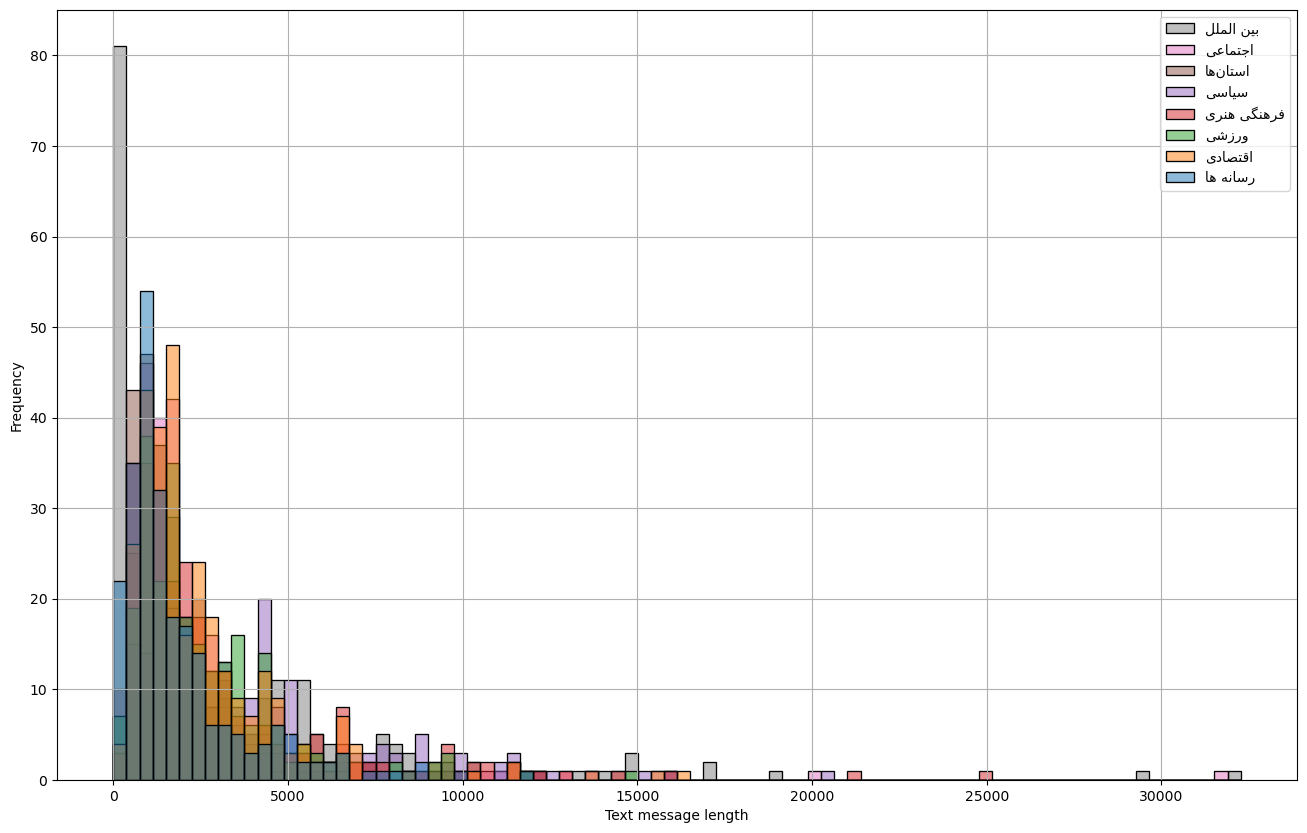

----------------------------------------------------------------------------------------------------


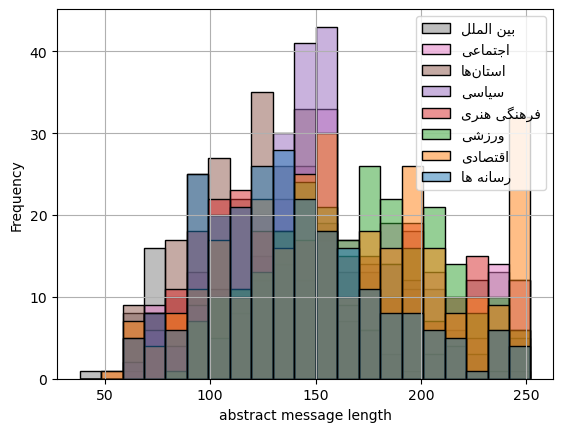

----------------------------------------------------------------------------------------------------


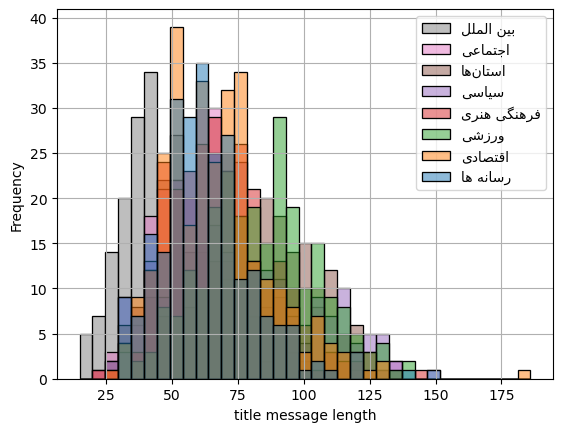

----------------------------------------------------------------------------------------------------


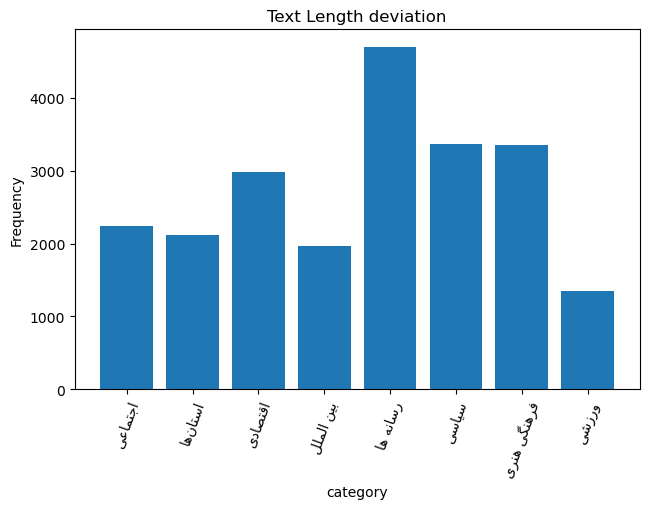

In [ ]:


#calculate text length
sample_df['Text Length'] = sample_df['body'].apply(lambda x: len(str(x)))
sample_df['abstract Length'] = sample_df['abstract'].apply(lambda x: len(str(x)))
sample_df['title Length'] = sample_df['title'].apply(lambda x: len(str(x)))
# group the dataset by category
grouped_text = sample_df.groupby('category')
grouped_abstract_text = sample_df.groupby('category')
grouped_title_text = sample_df.groupby('category')
# calculate deviation for  text length of body text
category_dispersion = sample_df.groupby('category')['Text Length'].std()
# create histograms of text message lengths for each label

plt.figure(figsize = (16,10))
sns.histplot(sample_df, x ='Text Length', hue='category')
plt.legend( loc='best', labels=labels)
plt.xlabel('Text message length')
plt.ylabel('Frequency')
plt.grid()
plt.show()
print('-'*100)

sns.histplot(sample_df, x ='abstract Length', hue='category')
plt.legend( loc='best', labels=labels)
plt.xlabel('abstract message length')
plt.ylabel('Frequency')
plt.grid()
plt.show()
print('-'*100)
sns.histplot(sample_df, x ='title Length', hue='category')
plt.legend( loc='best', labels=labels)
plt.xlabel('title message length')
plt.ylabel('Frequency')
plt.grid()
plt.show()
print('-'*100)

dd=pd.DataFrame(category_dispersion)
dd.columns =['Text Length deviation']
category_label = list(dd.index.unique())
labels = [get_display(reshape(i)) for i in category_label]
plt.bar(labels,dd['Text Length deviation'])
plt.xticks(rotation=70)
plt.tight_layout()
plt.xlabel('category')
plt.ylabel('Frequency')
plt.title('Text Length deviation')
plt.show()


# B. Text Cleaning

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
from nltk.tokenize import word_tokenize
import hazm


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hamidreza\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
per_sw= pd.read_csv('C:/Users/hamidreza/Desktop/stopwords.txt',header=None)
stopwordseng = stopwords.words('english')


In [ ]:
per_sw.head()

,0
0,﷼
1,‏‏‏علاقه مند
2,‏یاب
3,‏گیر
4,‏گوی


In [ ]:
persian_w=(list(per_sw[0]))

In [ ]:
for i in range(0,len(persian_w)):
    persian_w[i] = persian_w[i].replace('\u200f', '')
    persian_w[i] = persian_w[i].replace('\u200c', '')
    persian_w[i] = persian_w[i].replace('\x7f', '')
    persian_w[i] = persian_w[i].replace('\ufeff', '')
pw=list(persian_w)

In [ ]:
pw

['﷼',
 'علاقه مند',
 'یاب',
 'گیر',
 'گوی',
 'کن',
 'شو',
 'دیگران',
 'دار',
 'خواه',
 'توان',
 'باش',
 'آی',
 'آور',
 'یکی',
 'یکهزار',
 'یکسال',
 'یکریز',
 'یکدیگر',
 'یک کمی',
 'یک کم',
 'یک چیزی',
 'یک جوری',
 'یک',
 'یواش یواش',
 'یواش',
 'یو',
 'یه',
 'یكی',
 'یكپارچه',
 'یكنواخت',
 'یكطرفه',
 'یكسری',
 'یكسره',
 'یكسال',
 'یكزمان',
 'یكریز',
 'یكدیگر',
 'یكدیر',
 'یكدم',
 'یكجوری',
 'یكجور',
 'یكجانبه',
 'یكجا',
 'یكباره',
 'یكبار',
 'یكایك',
 'یك',
 'یقیناً',
 'یقینا',
 'یعنی',
 'یشتری',
 'یشتر',
 'یش',
 'یست',
 'یری',
 'یرونِ',
 'یرد',
 'یافتیم',
 'یافتید',
 'یافتی',
 'یافته',
 'یافتن',
 'یافتم',
 'یافت',
 'یارب',
 'یاد',
 'یابیم',
 'یابید',
 'یابی',
 'یابند',
 'یابم',
 'یابد',
 'یاب',
 'یااینكه',
 'یاانكه',
 'یااز',
 'یا',
 'ی',
 'گیریم',
 'گیرید',
 'گیری',
 'گیرند',
 'گیرم',
 'گیرد',
 'گیر',
 'گيري',
 'گيرد',
 'گوییم',
 'گویید',
 'گویی',
 'گویند',
 'گویم',
 'گوید',
 'گویان',
 'گویا',
 'گوی',
 'گويند',
 'گويد',
 'گونه',
 'گو',
 'گهگاهی',
 'گهگاه',
 'گه',
 'گمان',
 'گفتیم',
 '

In [ ]:
def remove_mark(text):
    return re.sub(r'[^\w\s]', '', text)

def remove_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()
def text_process(text):
    normalizer = Normalizer()
    text = normalizer.normalize(text)
    text = text.split()
    # Remove Persian stopwords, NLTK stopwords, and punctuation
    stopwords_set = set(pw+ stopwords.words('english'))
    text = [word for word in text if word not in stopwords_set and
            word not in string.punctuation and
            word not in string.digits ]

    # Join the tokens back into a string
    cleaned_text = ' '.join(text)
    return cleaned_text

In [ ]:
df['body_new'] = df['body'].apply(text_process)
df['body_new'] = df['body_new'].apply(remove_html)
df['body_new'] = df['body_new'].apply(remove_mark)
df

,category,title,abstract,body,time,body_new
0,سیاسی,میرکاظمی: زمان حذف ارز ۴۲۰۰ تومانی مشخص نیست,رئیس سازمان برنامه و بودجه گفت: هر زمان شرایط...,به گزارش گروه پارلمانی ، «مسعود میرکاظمی» رئی...,۲۴ فروردين ۱۴۰۱ - ۰۹:۵۰,گزارش گروه پارلمانی مسعود میرکاظمی رئیس سازمان...
1,سیاسی,طرح ۲ فوریتی شفافیت قوای سه‌گانه با ۲۰۰ امضا ...,نماینده نیشابور در مجلس از ارائه طرح ۲ فوریتی...,احسان ارکانی نماینده مردم نیشابور در مجلس شورا...,۲۴ فروردين ۱۴۰۱ - ۰۹:۵۰,احسان ارکانی نماینده نیشابور مجلس شورای اسلامی...
2,سیاسی,رئیسی انتخاب نخست وزیر جدید پاکستان را تبریک ...,رئیس جمهور کشورمان طی پیامی انتخاب نخست وزیر ...,به گزارش حوزه دولت ، آیت‌الله سید ابراهیم رئی...,۲۵ فروردين ۱۴۰۱ - ۱۳:۵۴,گزارش حوزه دولت آیتالله سید ابراهیم رئیسی رئیس...
3,سیاسی,اصلاح اساسنامه شرکت شهر فرودگاهی امام خمینی (...,اساسنامه شرکت شهر فرودگاهی امام خمینی(ره) در ...,به گزارش حوزه دولت ، در جلسه صبح روز چهارشنبه...,۳۱ فروردين ۱۴۰۱ - ۱۲:۰۳,گزارش حوزه دولت جلسه چهارشنبه هیئت دولت ریاست ...
4,سیاسی,ارائه طرحی کلی و مبهم برای شفافیت فرار از مطا...,نماینده مردم تهران گفت: در شرایطی که طرح شفاف...,علی خضریان نماینده تهران در مجلس در گفت‌وگو با...,۳۰ فروردين ۱۴۰۱ - ۱۶:۱۵,خضریان نماینده تهران مجلس گفتوگو خبرنگار پارلم...
...,...,...,...,...,...,...
63489,رسانه ها,پشیمانی به سبک سلبریتی‌ها,گروه‌های زیادی از هنرمندان در فضای شخصی خود پ...,به گزارش گروه رسانه های ، چند روزی از تقدیم ل...,۲۲ آذر ۱۳۹۶ - ۰۸:۵۳,گزارش گروه رسانههای روزی تقدیم لایحه بودجه ۹۷ ...
63490,رسانه ها,نسبت اصلاح طلبان با اخلاق، عدالت و آزادی!,اصلاح طلبان چه می کنند، حال و روزشان چیست؟ اد...,به گزارش گروه رسانه های ، اصلاح طلبان چه می ک...,۲۲ آذر ۱۳۹۶ - ۰۶:۴۲,گزارش گروه رسانههای اصلاح طلبان میکنند روزشان ...
63491,رسانه ها,چرا رژیم صهیونیستی بعد از ۲۵ سال نابود می‌شود؟,گسترش افراط گرایی ارتدکس در ساختار سیاسی و اج...,به گزارش گروه رسانه های ، خبری که در روزهای ا...,۲۳ آذر ۱۳۹۶ - ۱۲:۵۰,گزارش گروه رسانههای خبری رسانههای جهان خصوص کش...
63492,رسانه ها,تصاویر صفحه روزنامه‌های چهارشنبه ۲۲ آذر,منتخب تصاویر صفحات نخست روزنامه‌های چهارشنبه ...,به گزارش گروه رسانه‌های ، تصاویر صفحات نخست ر...,۲۲ آذر ۱۳۹۶ - ۰۵:۴۹,گزارش گروه رسانههای تصاویر صفحات روزنامههای کش...


# C. Word Cloud

In [ ]:
#TODO
from wordcloud_fa import WordCloudFa
from wordcloud import WordCloud
from hazm import word_tokenize
politic_df = df[df['category'] == 'سیاسی']

politic_df_1000=politic_df.head(1000)

In [ ]:
politic_df_1000

,category,title,abstract,body,time,body_new
0,سیاسی,میرکاظمی: زمان حذف ارز ۴۲۰۰ تومانی مشخص نیست,رئیس سازمان برنامه و بودجه گفت: هر زمان شرایط...,به گزارش گروه پارلمانی ، «مسعود میرکاظمی» رئی...,۲۴ فروردين ۱۴۰۱ - ۰۹:۵۰,گزارش گروه پارلمانی مسعود میرکاظمی رئیس سازمان...
1,سیاسی,طرح ۲ فوریتی شفافیت قوای سه‌گانه با ۲۰۰ امضا ...,نماینده نیشابور در مجلس از ارائه طرح ۲ فوریتی...,احسان ارکانی نماینده مردم نیشابور در مجلس شورا...,۲۴ فروردين ۱۴۰۱ - ۰۹:۵۰,احسان ارکانی نماینده نیشابور مجلس شورای اسلامی...
2,سیاسی,رئیسی انتخاب نخست وزیر جدید پاکستان را تبریک ...,رئیس جمهور کشورمان طی پیامی انتخاب نخست وزیر ...,به گزارش حوزه دولت ، آیت‌الله سید ابراهیم رئی...,۲۵ فروردين ۱۴۰۱ - ۱۳:۵۴,گزارش حوزه دولت آیتالله سید ابراهیم رئیسی رئیس...
3,سیاسی,اصلاح اساسنامه شرکت شهر فرودگاهی امام خمینی (...,اساسنامه شرکت شهر فرودگاهی امام خمینی(ره) در ...,به گزارش حوزه دولت ، در جلسه صبح روز چهارشنبه...,۳۱ فروردين ۱۴۰۱ - ۱۲:۰۳,گزارش حوزه دولت جلسه چهارشنبه هیئت دولت ریاست ...
4,سیاسی,ارائه طرحی کلی و مبهم برای شفافیت فرار از مطا...,نماینده مردم تهران گفت: در شرایطی که طرح شفاف...,علی خضریان نماینده تهران در مجلس در گفت‌وگو با...,۳۰ فروردين ۱۴۰۱ - ۱۶:۱۵,خضریان نماینده تهران مجلس گفتوگو خبرنگار پارلم...
...,...,...,...,...,...,...
996,سیاسی,افزایش تعداد داوطلب شفافیت آرا در مجلس/ ۹۰ نم...,تعداد نمایندگانی که نامه به هیئت‌رئیسه مجلس ش...,به گزارش خبرنگار پارلمانی ، در روزهای گذشته ج...,۱۹ بهمن ۱۴۰۰ - ۱۱:۰۱,گزارش خبرنگار پارلمانی نمایندگان نامهای رئیس م...
997,سیاسی,رئیسی: کشورهای مستقل با تامین نیازمندهای یکدی...,رئیس جمهور با تاکید بر اهمیت توسعه و تعمیق رو...,به گزارش حوزه دولت ، آیت‌الله سید ابراهیم رئی...,۱۹ بهمن ۱۴۰۰ - ۱۳:۱۶,گزارش حوزه دولت آیتالله سید ابراهیم رئیسی رئیس...
998,سیاسی,بهادری‌جهرمی: سود سهام عدالت تا پایان سال وار...,سخنگوی دولت گفت: همان‌گونه که اعلام شد مطابق ...,به گزارش خبرنگار حوزه دولت ، علی بهادری‌جهرمی...,۱۹ بهمن ۱۴۰۰ - ۱۱:۲۰,گزارش خبرنگار حوزه دولت بهادریجهرمی سخنگوی دول...
999,سیاسی,سیر دگردیسی مجمع روحانیون مبارز؛ از حمایت صدا...,مجمع روحانیون مبارز در روزهای گذشته بیانیه‌ای...,به گزارش خبرنگار سیاسی ، مجمع روحانیون مبارز ...,۱۹ بهمن ۱۴۰۰ - ۱۳:۳۲,گزارش خبرنگار سیاسی مجمع روحانیون مبارز مجمع م...


In [ ]:
# remove "انتهای پیام"
def remove_end(text):
    text = text[:-12]
    return text


In [ ]:
politic_df_1000['body_new'] = politic_df_1000['body_new'].apply(remove_end)

Text(0.5, 1.0, 'politic WordCloud')

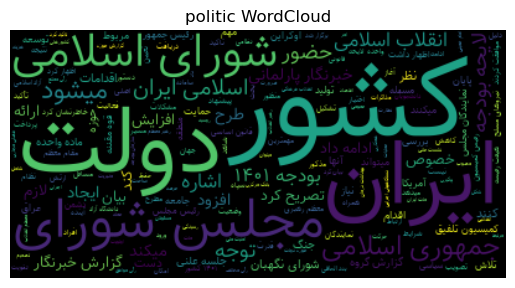

In [ ]:
politic_text = ' '.join(politic_df_1000['body_new'])

from wordcloud_fa import WordCloudFa
from wordcloud import WordCloud


politic_text_cloud = politic_text

spam_wordcloud = WordCloudFa().generate(politic_text_cloud)


plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("politic WordCloud")

# D. Vectorization

In [ ]:
df_body = df.sample(frac=1, random_state=42).reset_index(drop=True)

sample_size = 1000
sample_df_body = df_body.head(sample_size)

In [ ]:
#convert the text data into vectors
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
#TODO
text_body = sample_df_body['body_new']

tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the text data
tfidf_matrix = tfidf_vectorizer.fit_transform(text_body)

# Get the feature names
feature_names = tfidf_vectorizer.get_feature_names_out()

# Convert the TF-IDF matrix to a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

In [ ]:
tfidf_df


,_اجتماعی,abbas,ac,acm,action,afc,against,ai,aic,aids,...,۹۹۷واحد,۹۹۸,۹۹۸۱۷,۹۹۸۱۸,۹۹۸۲۸,۹۹۸۳۰,۹۹۹۱۴,۹۹۹۲۸,۹۹۹۹,۹۹۹۹۹
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
vectorizer2 = CountVectorizer()
vectorizer2.fit(text_body)
X_count = vectorizer2.transform(text_body)
feature_names = vectorizer2.get_feature_names_out()
cv_df = pd.DataFrame(X_count.toarray(), columns=feature_names)
cv_df

,_اجتماعی,abbas,ac,acm,action,afc,against,ai,aic,aids,...,۹۹۷واحد,۹۹۸,۹۹۸۱۷,۹۹۸۱۸,۹۹۸۲۸,۹۹۸۳۰,۹۹۹۱۴,۹۹۹۲۸,۹۹۹۹,۹۹۹۹۹
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# E. Train and test split

In [ ]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
y = label.fit_transform(sample_df_body["category"])
X_ctv = cv_df
X_tfi = tfidf_df


# F. Model Training

In [ ]:
#TODO
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

class ModelFitter:
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, random_state=42, test_size=0.3)

    def fit_knn(self):
        knn = KNeighborsClassifier()
        param_grid = {'n_neighbors': [1, 2, 3, 5, 7, 9]}
        grid_search = GridSearchCV(knn, param_grid, cv=5)
        grid_search.fit(self.X_train, self.y_train)
        best_n_neighbors = grid_search.best_params_['n_neighbors']
        best_score = grid_search.best_score_
        return "Best n_neighbors:", best_n_neighbors, "Best score:", best_score

    def fit_lr(self):
        logistic_regression = LogisticRegression()
        param_grid = {'penalty': ['l1', 'l2']}
        grid_search = GridSearchCV(logistic_regression, param_grid, cv=5)
        grid_search.fit(self.X_train, self.y_train)
        best_penalty = grid_search.best_params_['penalty']
        best_score = grid_search.best_score_
        return "Best penalty:", best_penalty, "Best score:", best_score

    def fit_rf(self):
        rfc = RandomForestClassifier()
        scores = cross_val_score(rfc, self.X, self.y, cv=5)
        return "Cross-validation scores:", np.array(scores).mean()

    def fit_dt(self):
        dtc = DecisionTreeClassifier()
        scores = cross_val_score(dtc, self.X, self.y, cv=5)
        return "Cross-validation scores:", np.array(scores).mean()

    def fit_svm(self):
        svc = SVC(kernel='linear')
        scores = cross_val_score(svc, self.X, self.y, cv=5)
        return "Cross-validation scores:", np.array(scores).mean()




In [ ]:
#Knn - TfidfVectorizer
model = ModelFitter(X_tfi, y)
print(model.fit_knn())

('Best n_neighbors:', 9, 'Best score:', 0.31285714285714283)


In [ ]:
#Knn - CountVectorizer
model = ModelFitter(X_ctv , y)
print(model.fit_knn())

('Best n_neighbors:', 1, 'Best score:', 0.3828571428571429)


In [ ]:
#lr - TfidfVectorizer
model = ModelFitter(X_tfi, y)
print(model.fit_lr())

('Best penalty:', 'l2', 'Best score:', 0.7357142857142858)


In [ ]:
#lr - CountVectorizer
model = ModelFitter(X_ctv , y)
print(model.fit_lr())

('Best penalty:', 'l2', 'Best score:', 0.7242857142857144)


In [ ]:
#rf - TfidfVectorizer
model = ModelFitter(X_tfi, y)
print(model.fit_rf())

('Cross-validation scores:', 0.8119999999999999)


In [ ]:
#rf - CountVectorizer
model = ModelFitter(X_ctv , y)
print(model.fit_rf())

('Cross-validation scores:', 0.8099999999999999)


In [ ]:
#dt - TfidfVectorizer
model = ModelFitter(X_tfi, y)
print(model.fit_dt())

('Cross-validation scores:', 0.6970000000000001)


In [ ]:
#dt - CountVectorizer
model = ModelFitter(X_ctv , y)
print(model.fit_dt())

('Cross-validation scores:', 0.724)


In [ ]:
#svm - TfidfVectorizer
model = ModelFitter(X_tfi, y)
print(model.fit_svm())

('Cross-validation scores:', 0.776)


In [ ]:
#svm - CountVectorizer
model = ModelFitter(X_ctv , y)
print(model.fit_svm())

('Cross-validation scores:', 0.675)


In [ ]:

class KnnPlotter:
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, random_state=42, test_size=0.3)

    def plot_Knn(self, n_neighbors=[1, 2, 3, 5, 7, 9]):
        output = {}
        for n in n_neighbors:
            knn = KNeighborsClassifier(n_neighbors=n)
            scores = cross_val_score(knn, self.X, self.y, cv=5)
            output[n] = np.average(scores)
        plt.plot(output.keys(), output.values())
        plt.xlabel("n values")
        plt.ylabel("Score")
        plt.show()




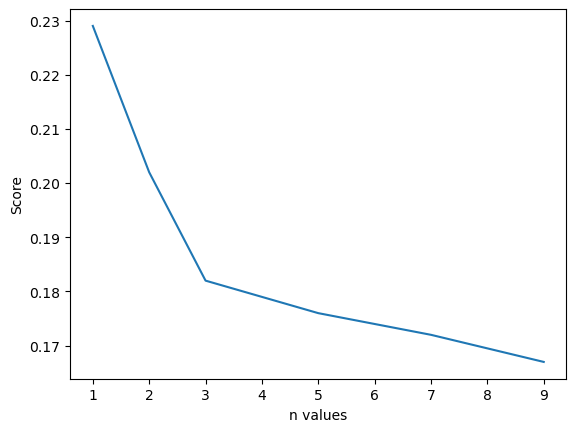

In [ ]:
##Knn - TfidfVectorizer
knn_plotter = KnnPlotter(X_tfi, y)
knn_plotter.plot_Knn()

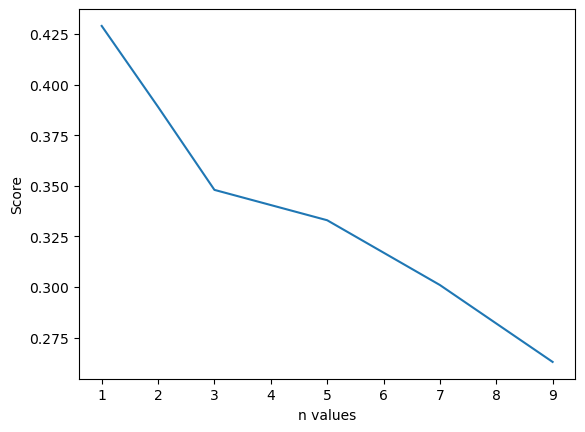

In [ ]:
##Knn - CountVectorizer
knn_plotter = KnnPlotter(X_ctv, y)
knn_plotter.plot_Knn()

In [ ]:
def build_model_dataframe(X1,X2,y,v1 = "TfidfVectorizer" , v2 = "CountVectorizer"):
    out = []
    model1 = ModelFitter(X1, y)
    model2 = ModelFitter(X2, y)

    out.append(["KNN",model1.fit_knn()[3],v1])
    out.append(["KNN",model2.fit_knn()[3],v2])

    out.append(["Logistic Regression",model1.fit_lr()[3],v1])
    out.append(["Logistic Regression",model2.fit_lr()[3],v2])

    out.append(["Random Forest",model1.fit_rf()[1],v1])
    out.append(["Random Forest",model2.fit_rf()[1],v2])

    out.append(["Decision Tree",model1.fit_dt()[1],v1])
    out.append(["Decision Tree",model2.fit_dt()[1],v2])

    out.append(["SVM",model1.fit_svm()[1],v1])
    out.append(["SVM",model2.fit_svm()[1],v2])

    output_df = pd.DataFrame(out , columns=["model","acuuracy","vec"])
    return output_df

In [ ]:
output_df = build_model_dataframe(X_tfi,X_ctv,y)

In [ ]:
output_df

,model,acuuracy,vec
0,KNN,0.312857,TfidfVectorizer
1,KNN,0.382857,CountVectorizer
2,Logistic Regression,0.735714,TfidfVectorizer
3,Logistic Regression,0.724286,CountVectorizer
4,Random Forest,0.802000,TfidfVectorizer
5,Random Forest,0.798000,CountVectorizer
6,Decision Tree,0.694000,TfidfVectorizer
7,Decision Tree,0.724000,CountVectorizer
8,SVM,0.776000,TfidfVectorizer
9,SVM,0.675000,CountVectorizer


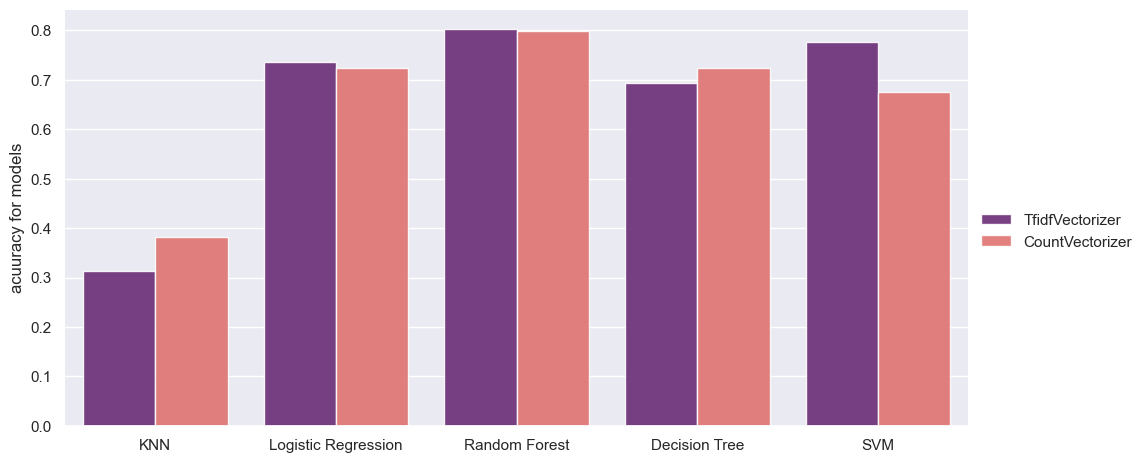

In [ ]:
sns.set_theme(style="darkgrid")

plot = sns.catplot(
    data=output_df, kind="bar",
    x="model", y="acuuracy", hue="vec"
    , palette="magma", alpha=.9, height=5 , aspect=2
)

plot.despine(left=True)
plot.set_axis_labels("", "acuuracy for models")
plot.legend.set_title("")





In [ ]:
#reasons of Superiority of the TfidfVectorizer


TfidfVetorizer uses the TF-IDF weighting scheme, which takes into account the frequency of a term in a document as well as its importance in the entire collection. This weighting scheme gives more weight to terms that are rare in the collection but common in a particular document. By considering the inverse frequency of the document, TfidfVetorizer can effectively reduce the common terms and prioritize the rare and distinct terms. This results in a more informative and meaningful feature representation compared to the CountVetorizer which only considers the frequency term.

In [ ]:
#reasons of Superiority of the random forest

Random forest classification has gained popularity and proven its superiority in various scenarios for the following reasons:

Robustness to noise and overfitting: Random forests are robust to noise and outliers. The ensemble nature of Random Forest, which combines multiple decision trees, helps reduce the impact of tree errors and produces more reliable and stable predictions. Compared to individual decision trees, it is less prone to overfitting and more resilient to noisy or unbalanced datasets.

Nonlinear and complex interactions: Random forests can capture complex nonlinear relationships and interactions between features. Unlike linear models, random forests do not assume linearity in the data. This makes them suitable for tasks where the relationships between the input features and the target variable are complex and cannot be adequately modeled by a linear function.

Handling high-dimensional data: Random forests can efficiently handle high-dimensional data without the need for feature selection or dimensionality reduction techniques. They have the ability to automatically select informative features by randomly considering a subset of features in each partition. This makes random forests suitable for tasks with large feature spaces, such as text classification or image recognition, where feature selection can be challenging.

Feature Importance Estimation: Random forests provide a measure of feature importance that shows the contribution of each feature to the prediction. This information can be valuable for feature selection, understanding underlying patterns in the data, and identifying the most influential factors. Feature importance can help interpret model decisions and guide feature engineering efforts.

Handling unbalanced data sets: Random forests can handle unbalanced data sets without the need for reweighting or explicit sampling methods. By pooling predictions from multiple decision trees, random forests can better balance predictions from different classes and reduce bias toward the majority class. This is particularly useful in classification tasks where the class distribution is highly skewed.